[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/BMED365-2026/blob/main/labs/Lab1-NetworkSci-PSN/notebooks/00-introduction-slides.ipynb)


Version 2025.01.08 - A. Lundervold

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219-2025/blob/main/Lab1-NetworkSci-PSN/notebooks/00-introduction-slides.ipynb)

### Introduction to Graph thepry, Networks science and Patient similarity networks

In Python, we can use the `networkx` library to create and analyse graphs, and
 -  `cursor` (with **claude**-3.5-sonnet) to help us code locally.
 -  `colab` (with **gemini**) to help us code in the cloud.

In [22]:
# Check if we are in colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

In [23]:
if is_colab():
    # Ask Gemini: _What is a graph?_
    import networkx as nx

    # Create a graph object
    graph = nx.Graph()

    # Add nodes
    graph.add_node("Patient A")
    graph.add_node("Disease X")

    # Add an edge
    graph.add_edge("Patient A", "Disease X")

    # Print the nodes and edges
    print("Nodes:", graph.nodes())
    print("Edges:", graph.edges())
else:
    print("This code is not running in Colab.")


This code is not running in Colab.


In [24]:
if is_colab():
    # Ask Gemini: _Can you make a figure of this?_
    import networkx as nx
    import matplotlib.pyplot as plt

    # Create a graph object
    graph = nx.Graph()

    # Add nodes
    graph.add_node("Patient A")
    graph.add_node("Disease X")

    # Add an edge
    graph.add_edge("Patient A", "Disease X")

    # Draw the graph
    nx.draw(graph, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold")

    # Show the plot
    plt.show()
else:
    print("This code is not running in Colab.")


This code is not running in Colab.


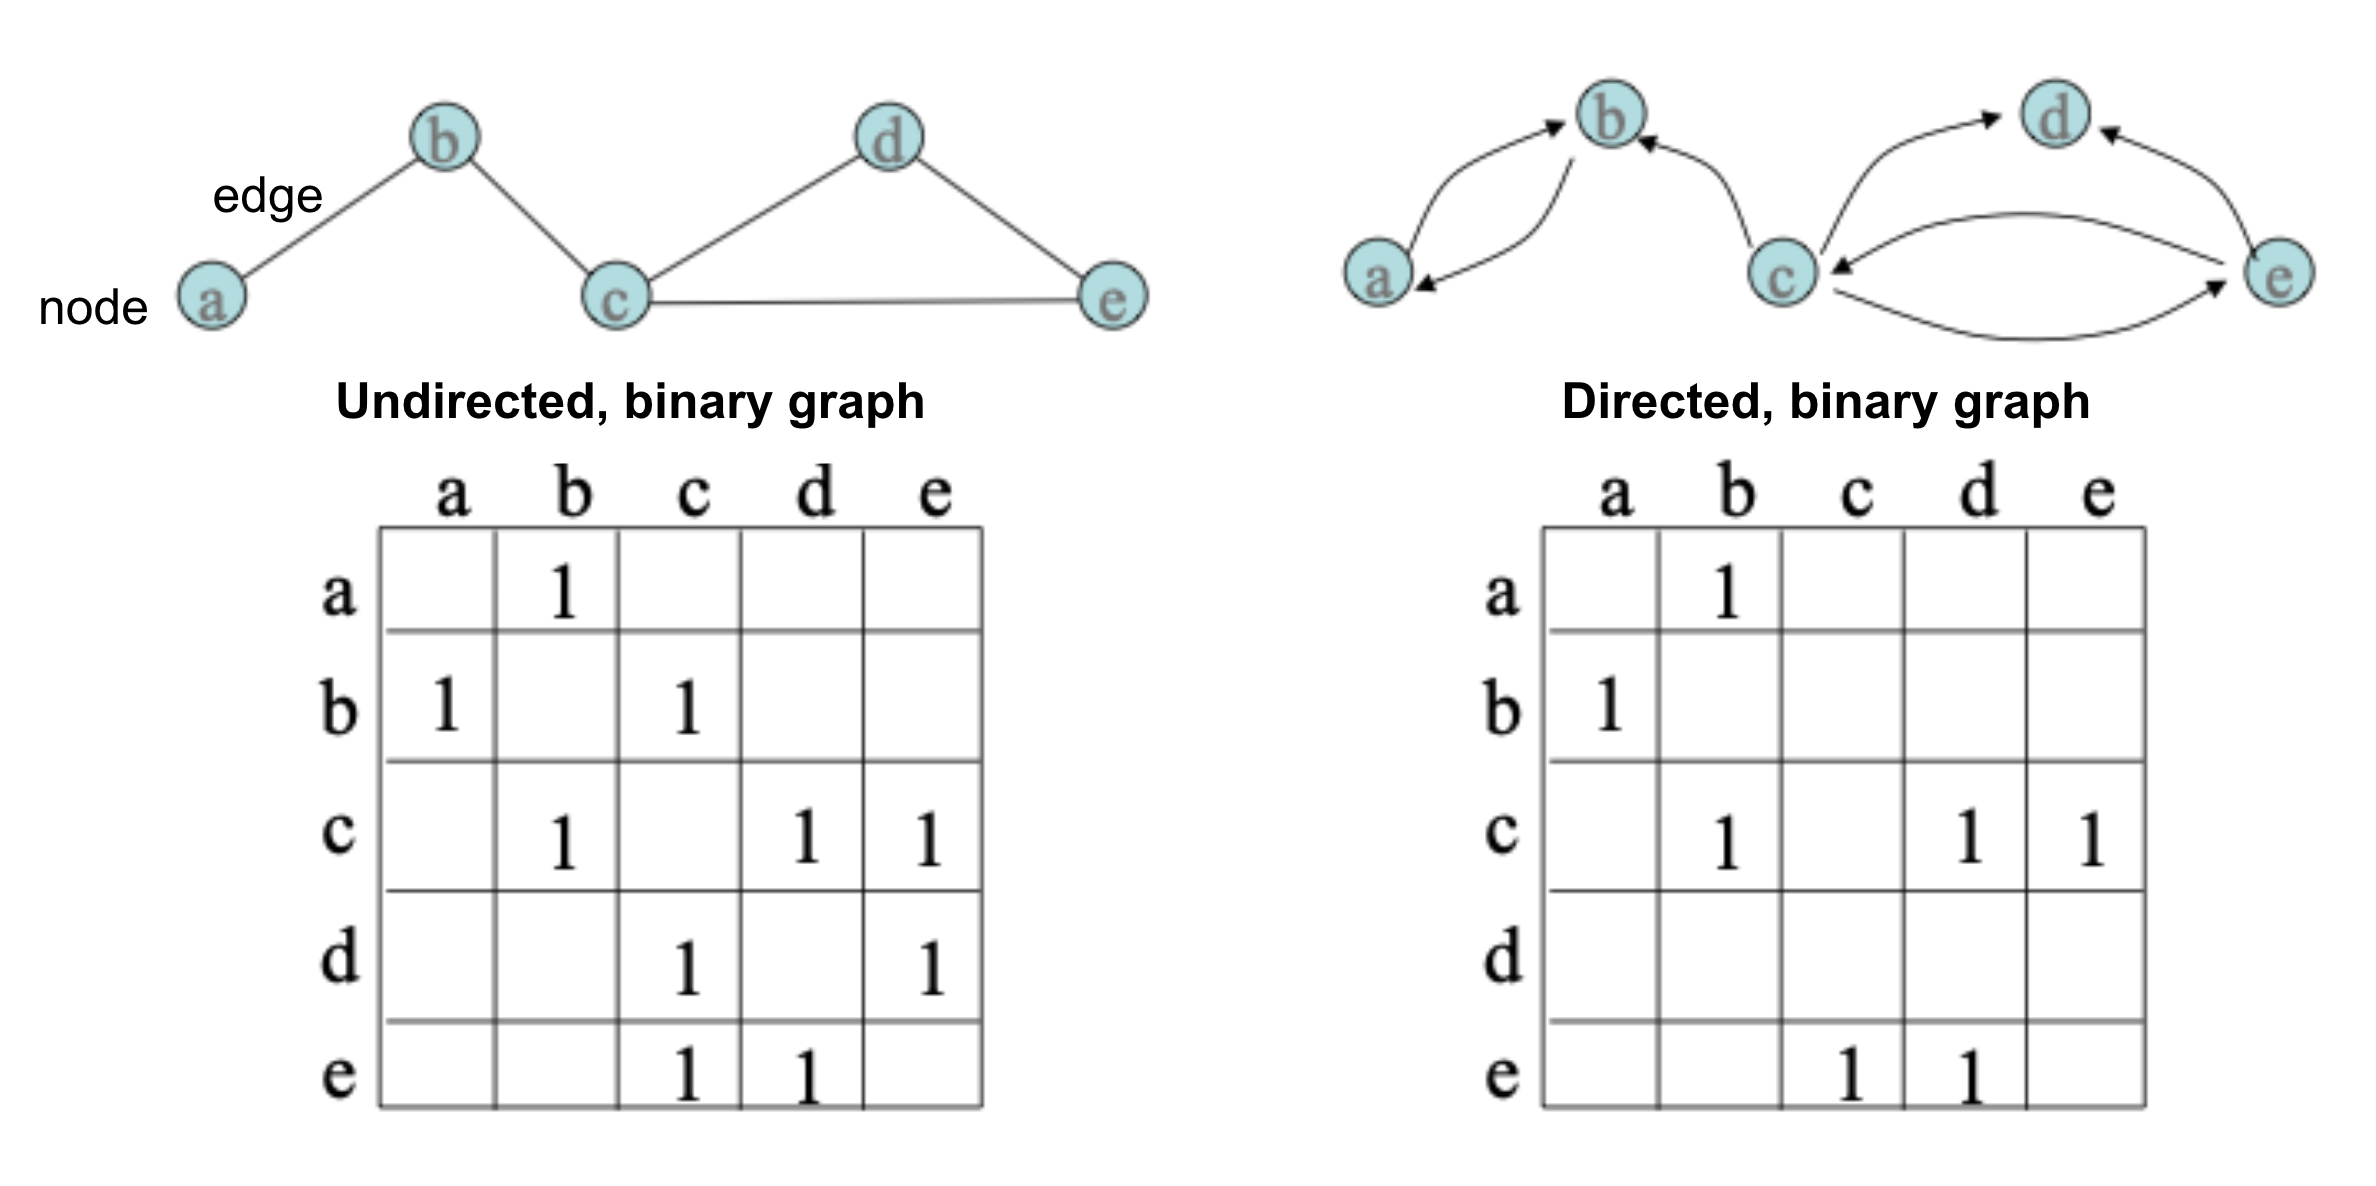

In [25]:
from IPython.display import display,Image

if is_colab():
    !wget https://raw.githubusercontent.com/MMIV-ML/ELMED219-2025/main/Lab1-NetworkSci-PSN/assets/binary_graphs.png
    display(Image('binary_graphs.png'))
else:
    display(Image(filename='../assets/binary_graphs.png'))

_Can you make Python code the reproduces the figure above?_

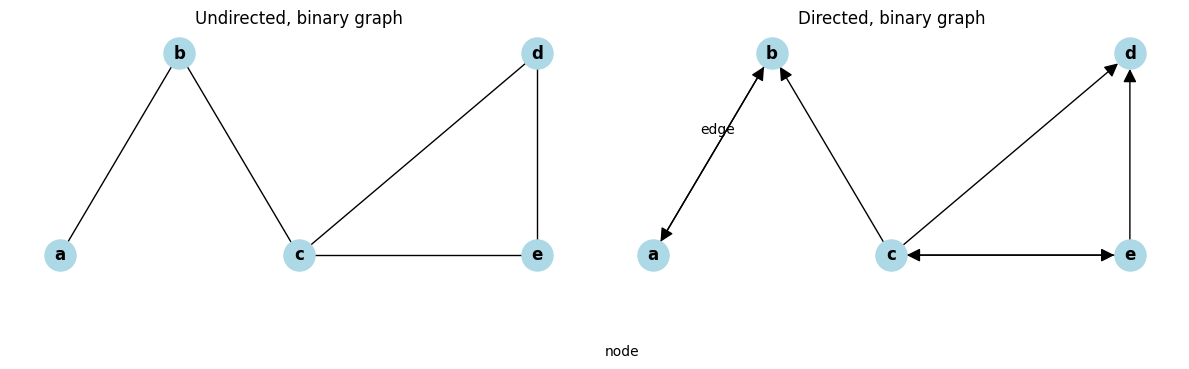


Undirected Adjacency Matrix:
  a b c d e
a   1      
b 1   1    
c   1   1 1
d     1   1
e     1 1  

Directed Adjacency Matrix:
  a b c d e
a   1      
b 1        
c   1   1 1
d          
e     1 1  


In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Create undirected graph
G_undirected = nx.Graph()
G_undirected.add_edges_from([
    ('a', 'b'),
    ('b', 'c'),
    ('c', 'd'),
    ('c', 'e'),
    ('d', 'e')
])

# Create directed graph
G_directed = nx.DiGraph()
G_directed.add_edges_from([
    ('a', 'b'),
    ('b', 'a'),
    ('c', 'b'),
    ('c', 'd'),
    ('c', 'e'),
    ('e', 'd'),
    ('e', 'c')
])

# Set positions for the nodes (you might need to adjust these to match exactly)
pos_undirected = {
    'a': (-1, 0),
    'b': (-0.5, 1),
    'c': (0, 0),
    'd': (1, 1),
    'e': (1, 0)
}

pos_directed = {
    'a': (-1, 0),
    'b': (-0.5, 1),
    'c': (0, 0),
    'd': (1, 1),
    'e': (1, 0)
}

# Draw undirected graph
nx.draw(G_undirected, pos_undirected, ax=ax1, 
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold')
ax1.set_title("Undirected, binary graph")

# Draw directed graph
nx.draw(G_directed, pos_directed, ax=ax2,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold',
        arrows=True,
        arrowsize=20)
ax2.set_title("Directed, binary graph")

# Add edge label for demonstration
plt.text(-1.2, -0.5, "node", fontsize=10)
plt.text(-0.8, 0.6, "edge", fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create and print adjacency matrices
def print_adjacency_matrix(G, title):
    print(f"\n{title} Adjacency Matrix:")
    nodes = sorted(G.nodes())
    print("  " + " ".join(nodes))
    for i in nodes:
        row = [str(1) if G.has_edge(i, j) else " " for j in nodes]
        print(f"{i} {' '.join(row)}")

print_adjacency_matrix(G_undirected, "Undirected")
print_adjacency_matrix(G_directed, "Directed")

_Can you make the adjacency matrix as graphics using a grid?_

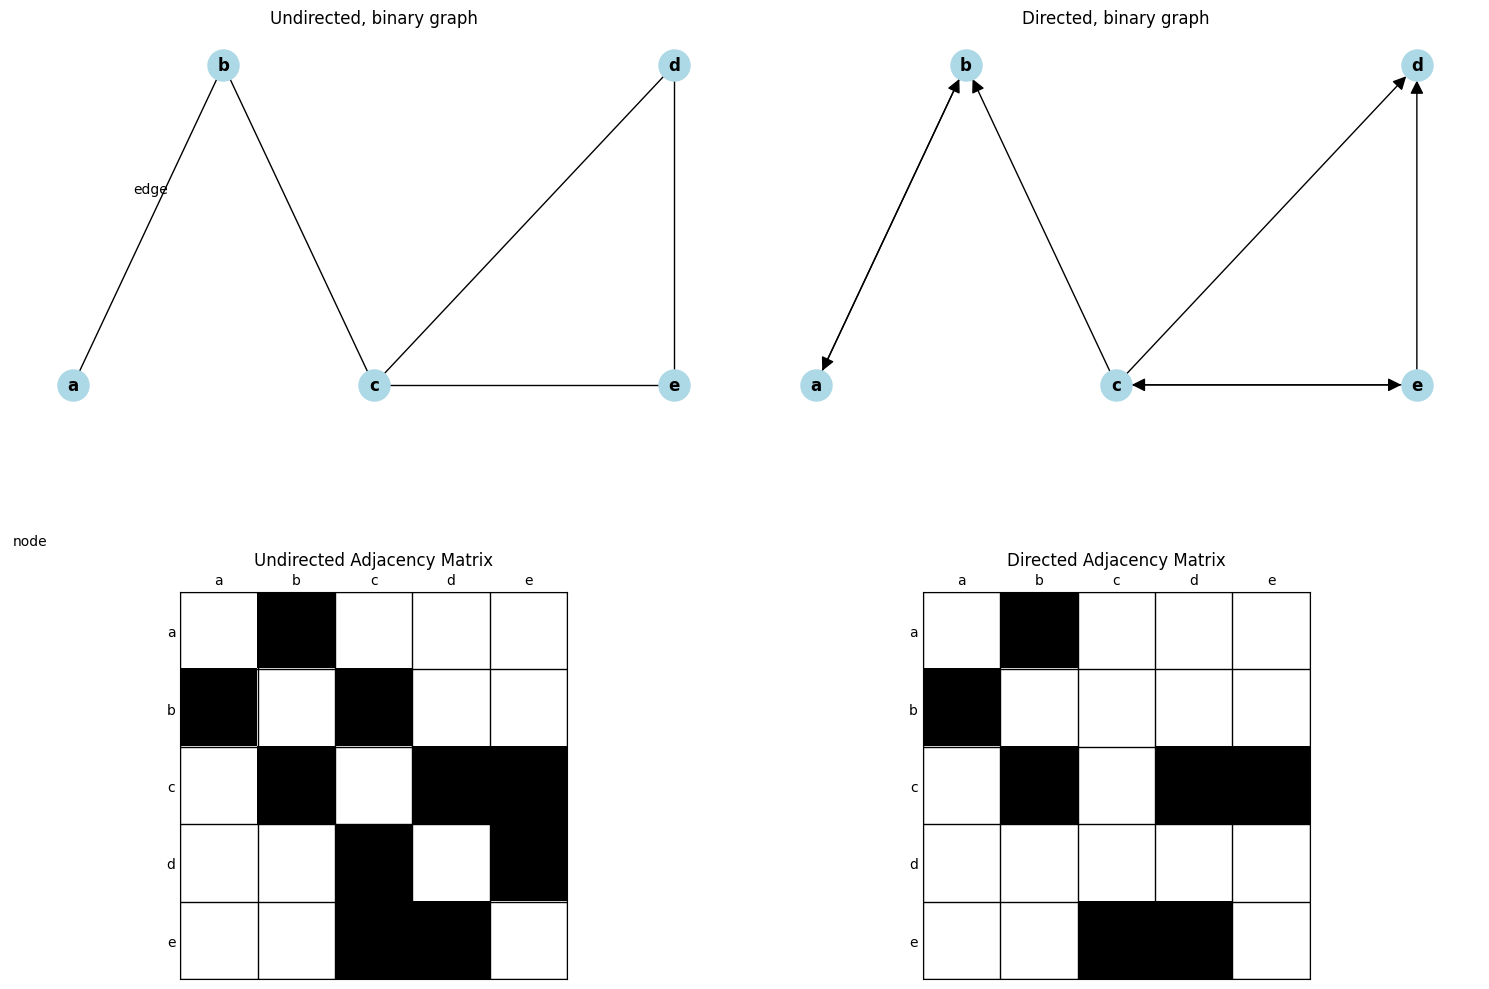

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create figure with 2x2 subplots
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Create undirected graph
G_undirected = nx.Graph()
G_undirected.add_edges_from([
    ('a', 'b'), ('b', 'c'), ('c', 'd'), ('c', 'e'), ('d', 'e')
])

# Create directed graph
G_directed = nx.DiGraph()
G_directed.add_edges_from([
    ('a', 'b'), ('b', 'a'), ('c', 'b'),
    ('c', 'd'), ('c', 'e'), ('e', 'd'), ('e', 'c')
])

# Set positions for the nodes
pos_undirected = {
    'a': (-1, 0), 'b': (-0.5, 1), 'c': (0, 0),
    'd': (1, 1), 'e': (1, 0)
}
pos_directed = pos_undirected.copy()

# Draw undirected graph
ax1 = fig.add_subplot(gs[0, 0])
nx.draw(G_undirected, pos_undirected, ax=ax1,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold')
ax1.set_title("Undirected, binary graph")
ax1.text(-1.2, -0.5, "node", fontsize=10)
ax1.text(-0.8, 0.6, "edge", fontsize=10)

# Draw directed graph
ax2 = fig.add_subplot(gs[0, 1])
nx.draw(G_directed, pos_directed, ax=ax2,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold',
        arrows=True,
        arrowsize=20)
ax2.set_title("Directed, binary graph")

# Create and draw adjacency matrices
def create_adjacency_matrix(G):
    nodes = sorted(G.nodes())
    n = len(nodes)
    matrix = np.zeros((n, n))
    for i, node1 in enumerate(nodes):
        for j, node2 in enumerate(nodes):
            if G.has_edge(node1, node2):
                matrix[i, j] = 1
    return matrix, nodes

def draw_adjacency_matrix(ax, matrix, nodes, title):
    n = len(nodes)
    ax.matshow(matrix, cmap='binary')
    
    # Add grid
    for i in range(n+1):
        ax.axhline(i-0.5, color='black', linewidth=1)
        ax.axvline(i-0.5, color='black', linewidth=1)
    
    # Add labels
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                ax.text(j, i, '1', ha='center', va='center', fontsize=12)
    
    # Add node labels
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(nodes)
    ax.set_yticklabels(nodes)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title(title)

# Draw undirected adjacency matrix
ax3 = fig.add_subplot(gs[1, 0])
matrix_undirected, nodes = create_adjacency_matrix(G_undirected)
draw_adjacency_matrix(ax3, matrix_undirected, nodes, "Undirected Adjacency Matrix")

# Draw directed adjacency matrix
ax4 = fig.add_subplot(gs[1, 1])
matrix_directed, nodes = create_adjacency_matrix(G_directed)
draw_adjacency_matrix(ax4, matrix_directed, nodes, "Directed Adjacency Matrix")

plt.tight_layout()
plt.show()

_Can you make a slidedeck with 20 slides illustrating the topic "Graph theory, Network science and Patient similarity networks" suited for second year medical students?_


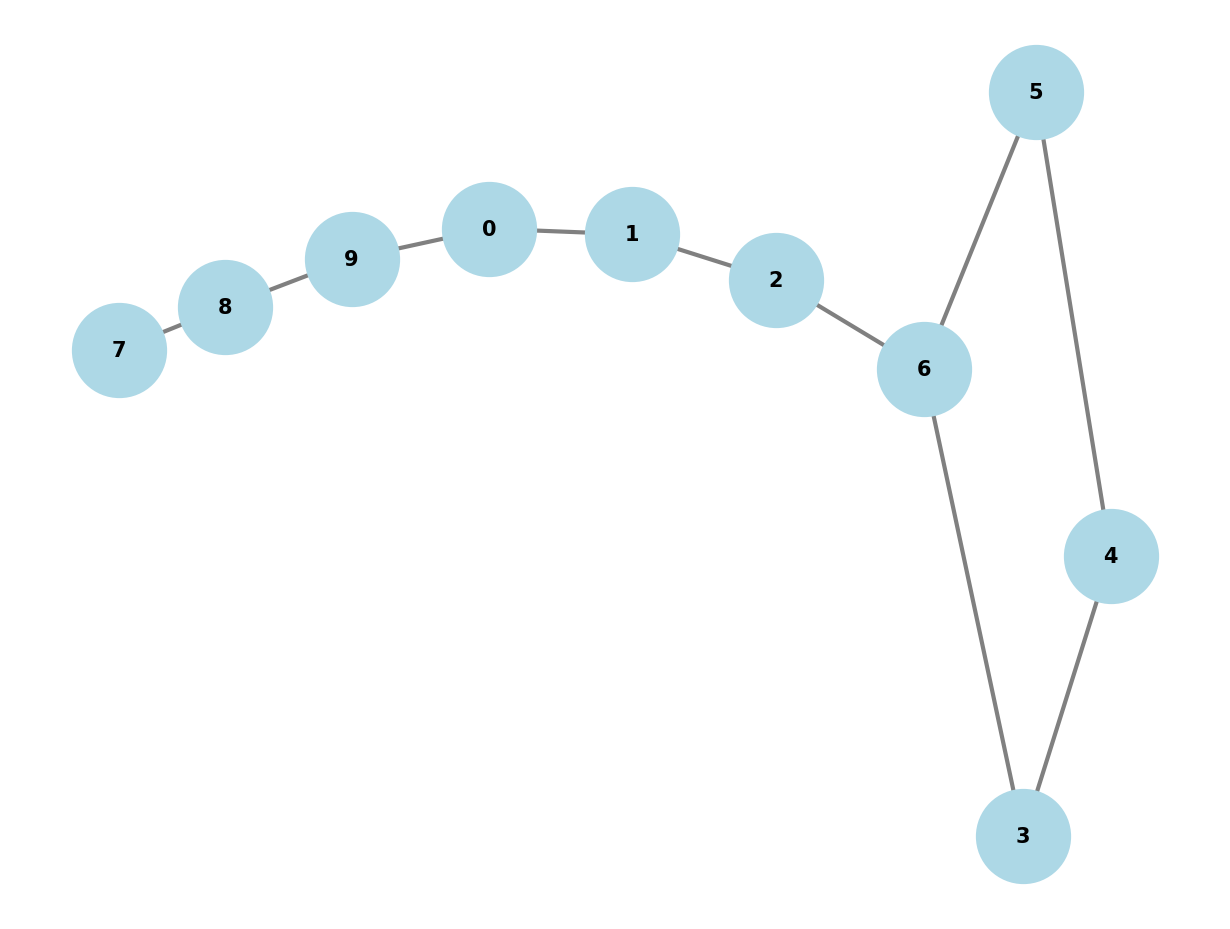

### Genetic Interactions

                * Gene Expression Networks
                    - Co-expression patterns
                    - Regulatory relationships

                * Disease Genetics
                    - Genetic risk factors
                    - Pathway analysis

In [8]:
from IPython.display import display, Markdown, HTML, clear_output
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
import io
import base64
import numpy as np

class SlideDeck:
    def __init__(self):
        self.current_slide = 0
        self.slides = self.prepare_slides()
        
        # Create navigation buttons with styling
        self.prev_button = widgets.Button(
            description='← Previous',
            layout=widgets.Layout(width='100px'))
        self.next_button = widgets.Button(
            description='Next →',
            layout=widgets.Layout(width='100px'))
        self.slide_number = widgets.HTML(value=self._get_slide_number())
        
        self.prev_button.on_click(self.prev_slide)
        self.next_button.on_click(self.next_slide)
        
        self.controls = widgets.HBox([
            self.prev_button, 
            self.slide_number, 
            self.next_button
        ], layout=widgets.Layout(
            display='flex',
            flex_flow='row',
            align_items='center',
            justify_content='center',
            margin='20px 0px'
        ))
        
        # Add custom CSS for bullet points
        display(HTML("""
        <style>
            li {
                margin-bottom: 1.5em !important;
                line-height: 1.6 !important;
            }
            ul {
                margin-top: 1.5em !important;
                margin-bottom: 1.5em !important;
            }
            h1 {
                margin-bottom: 1em !important;
            }
            h3 {
                margin-bottom: 1.5em !important;
            }
        </style>
        """))
        
        display(self.controls)
        self.display_current_slide()

    def generate_example_graphs(self):
        graphs = []
        
        # 1. Basic Graph
        G1 = nx.Graph()
        G1.add_edges_from([('Node A', 'Node B'), ('Node B', 'Node C'), 
                          ('Node C', 'Node D'), ('Node D', 'Node A')])
        
        # 2. Graph Properties
        G2 = nx.DiGraph()
        G2.add_weighted_edges_from([('Disease', 'Symptom 1', 0.8), 
                                  ('Disease', 'Symptom 2', 0.6)])
        
        # 3. Biological Network
        G3 = nx.Graph()
        proteins = ['Protein A', 'Protein B', 'Protein C', 'Protein D']
        G3.add_nodes_from(proteins)
        G3.add_edges_from([('Protein A', 'Protein B'), ('Protein B', 'Protein C'),
                          ('Protein C', 'Protein D'), ('Protein D', 'Protein A')])
        
        # 4. Clinical Network
        G4 = nx.Graph()
        G4.add_edges_from([('Fever', 'Flu'), ('Cough', 'Flu'), 
                          ('Fever', 'COVID'), ('Cough', 'COVID')])
        
        # 5. Patient Similarity
        G5 = nx.Graph()
        for i in range(6):
            G5.add_node(f'Patient {i+1}')
        G5.add_edges_from([('Patient 1', 'Patient 2'), ('Patient 2', 'Patient 3'),
                          ('Patient 3', 'Patient 4'), ('Patient 4', 'Patient 5')])
        
        # 6. Network Metrics
        G6 = nx.karate_club_graph()
        
        # 7. Centrality
        G7 = nx.star_graph(8)
        
        # 8. Clustering
        G8 = nx.random_geometric_graph(20, 0.2)
        
        # 9. Path Analysis
        G9 = nx.grid_2d_graph(4, 4)
        
        # 10. Network Visualization
        G10 = nx.random_geometric_graph(15, 0.3)
        
        # 11. Disease Networks
        G11 = nx.Graph()
        diseases = ['Diabetes', 'Heart Disease', 'Hypertension', 'Obesity']
        G11.add_nodes_from(diseases)
        G11.add_edges_from([('Diabetes', 'Heart Disease'), 
                           ('Hypertension', 'Heart Disease'),
                           ('Obesity', 'Diabetes')])
        
        # 12. Drug Interactions
        G12 = nx.DiGraph()
        drugs = ['Drug A', 'Drug B', 'Drug C']
        G12.add_nodes_from(drugs)
        G12.add_edges_from([('Drug A', 'Drug B'), ('Drug B', 'Drug C')])
        
        # 13. Gene Networks
        G13 = nx.watts_strogatz_graph(10, 3, 0.3)
        
        # 14. Protein Networks
        G14 = nx.barabasi_albert_graph(10, 2)
        
        # 15. Clinical Trials
        G15 = nx.Graph()
        trials = ['Trial 1', 'Trial 2', 'Trial 3']
        outcomes = ['Outcome A', 'Outcome B']
        G15.add_nodes_from(trials + outcomes)
        G15.add_edges_from([('Trial 1', 'Outcome A'), ('Trial 2', 'Outcome B')])
        
        # 16. AI Integration
        G16 = nx.balanced_tree(2, 3)
        
        # 17. Precision Medicine
        G17 = nx.Graph()
        elements = ['Genomics', 'Clinical Data', 'Treatment']
        G17.add_nodes_from(elements)
        G17.add_edges_from([('Genomics', 'Treatment'), 
                           ('Clinical Data', 'Treatment')])
        
        # 18. Case Studies
        G18 = nx.random_geometric_graph(10, 0.4)
        
        # 19. Future Directions
        G19 = nx.Graph()
        topics = ['AI', 'Big Data', 'Personalized Medicine']
        G19.add_nodes_from(topics)
        G19.add_edges_from([('AI', 'Big Data'), 
                           ('Big Data', 'Personalized Medicine')])
        
        # 20. Summary
        G20 = nx.Graph()
        concepts = ['Graph Theory', 'Medicine', 'Future']
        G20.add_nodes_from(concepts)
        G20.add_edges_from([('Graph Theory', 'Medicine'), 
                           ('Medicine', 'Future')])
        
        # Generate images for all graphs
        for G in [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, 
                 G11, G12, G13, G14, G15, G16, G17, G18, G19, G20]:
            plt.figure(figsize=(8,6))
            nx.draw(G, with_labels=True, node_color='lightblue', 
                   node_size=2000, font_size=10, font_weight='bold',
                   width=2, edge_color='gray')
            
            buf = io.BytesIO()
            plt.savefig(buf, format='png', bbox_inches='tight', dpi=150)
            buf.seek(0)
            img_str = base64.b64encode(buf.getvalue()).decode()
            plt.close()
            
            graphs.append(f'data:image/png;base64,{img_str}')
            
        return graphs

    def prepare_slides(self):
        graphs = self.generate_example_graphs()
        return [
            {
                "title": "What is a Graph?",
                "content": """### Basic Building Blocks

                * A graph is a mathematical structure showing relationships

                * Nodes (or Vertices): The objects we want to study
                    - Examples: Patients, Diseases, Symptoms

                * Edges: Connections between nodes
                    - Examples: Similar symptoms, Disease relationships""",
                "image": graphs[0]
            },
            # ... (continuing with all slides from Part 2)
            {
                "title": "Graph Properties",
                "content": """### Understanding Graph Characteristics

                * Directed vs Undirected
                    - Directed: One-way relationships (Disease → Symptom)
                    - Undirected: Two-way relationships (Patient similarity)

                * Weighted vs Unweighted
                    - Weighted: Connections have strength/importance
                    - Unweighted: Connections are binary (exist/don't exist)""",
                "image": graphs[1]
            },
            {
                "title": "Biological Networks",
                "content": """### Networks in Living Systems

                * Represent biological relationships
                    - Protein-protein interactions
                    - Gene regulatory networks
                    - Metabolic pathways

                * Help understand complex biological systems
                    - Disease mechanisms
                    - Drug targets
                    - Treatment responses""",
                "image": graphs[2]
            },
            {
                "title": "Clinical Networks",
                "content": """### Networks in Healthcare

                * Disease-Symptom Networks
                    - Connect diseases with their symptoms
                    - Show comorbidity relationships

                * Treatment-Response Networks
                    - Link treatments to outcomes
                    - Show drug interactions""",
                "image": graphs[3]
            },
            {
                "title": "Patient Similarity Networks",
                "content": """### Understanding Patient Relationships

                * Patients are represented as nodes

                * Connections show similarities between patients
                    - Similar symptoms
                    - Similar diagnoses
                    - Similar treatment responses

                * Help identify patient subgroups for personalized treatment""",
                "image": graphs[4]
            },
            {
                "title": "Network Metrics",
                "content": """### Measuring Network Properties

                * Degree: Number of connections per node

                * Density: Overall connectivity of network

                * Modularity: Community structure strength

                * Path Length: Distance between nodes""",
                "image": graphs[5]
            },
            {
                "title": "Centrality Measures",
                "content": """### Identifying Important Nodes

                * Degree Centrality: Number of direct connections

                * Betweenness Centrality: Bridge nodes between communities

                * Closeness Centrality: Average distance to all other nodes

                * Eigenvector Centrality: Connection to important nodes""",
                "image": graphs[6]
            },
            {
                "title": "Network Clustering",
                "content": """### Finding Patient Groups

                * Community Detection
                    - Identify similar patient groups
                    - Find disease subtypes

                * Clustering Coefficients
                    - Measure group connectivity
                    - Find tightly connected communities""",
                "image": graphs[7]
            },
            {
                "title": "Path Analysis",
                "content": """### Understanding Connections

                * Shortest Paths
                    - Disease progression routes
                    - Treatment pathways

                * Network Distance
                    - Patient similarity measures
                    - Disease relationships""",
                "image": graphs[8]
            },
            {
                "title": "Network Visualization",
                "content": """### Visual Analytics

                * Layout Algorithms
                    - Force-directed
                    - Circular
                    - Hierarchical

                * Visual Properties
                    - Node size/color
                    - Edge thickness/type
                    - Labels and annotations""",
                "image": graphs[9]
            },
            {
                "title": "Disease Networks",
                "content": """### Disease Relationships

                * Comorbidity Networks
                    - Disease co-occurrence
                    - Risk factors

                * Symptom Networks
                    - Symptom relationships
                    - Diagnostic patterns""",
                "image": graphs[10]
            },
            {
                "title": "Drug-Drug Interactions",
                "content": """### Medication Networks

                * Drug Interactions
                    - Beneficial combinations
                    - Harmful interactions

                * Side Effect Networks
                    - Common patterns
                    - Risk prediction""",
                "image": graphs[11]
            },
            {
                "title": "Gene Networks",
                "content": """### Genetic Interactions

                * Gene Expression Networks
                    - Co-expression patterns
                    - Regulatory relationships

                * Disease Genetics
                    - Genetic risk factors
                    - Pathway analysis""",
                "image": graphs[12]
            },
            {
                "title": "Protein Networks",
                "content": """### Protein Interactions

                * Protein-Protein Interaction Networks
                    - Physical interactions
                    - Functional relationships

                * Disease Mechanisms
                    - Molecular pathways
                    - Drug targets""",
                "image": graphs[13]
            },
            {
                "title": "Clinical Trial Networks",
                "content": """### Trial Analysis

                * Trial Outcomes
                    - Treatment effectiveness
                    - Side effect patterns

                * Patient Subgroups
                    - Response patterns
                    - Risk factors""",
                "image": graphs[14]
            },
            {
                "title": "AI Integration",
                "content": """### Machine Learning & Networks

                * Network-based Machine Learning
                    - Pattern recognition
                    - Prediction models

                * Graph Neural Networks
                    - Patient classification
                    - Outcome prediction""",
                "image": graphs[15]
            },
            {
                "title": "Precision Medicine",
                "content": """### Personalized Healthcare

                * Patient Profiling
                    - Individual characteristics
                    - Treatment response prediction

                * Treatment Selection
                    - Personalized recommendations
                    - Risk assessment""",
                "image": graphs[16]
            },
            {
                "title": "Case Studies",
                "content": """### Real-world Applications

                * Disease Subtyping
                    - Cancer subtypes
                    - Treatment response groups

                * Treatment Planning
                    - Therapy selection
                    - Risk management""",
                "image": graphs[17]
            },
            {
                "title": "Future Directions",
                "content": """### Emerging Trends

                * Real-time Analysis
                    - Dynamic networks
                    - Temporal patterns

                * Integration with Other Technologies
                    - Wearable devices
                    - Electronic health records""",
                "image": graphs[18]
            },
            {
                "title": "Summary",
                "content": """### Key Takeaways

                * Networks provide powerful tools for medical analysis

                * Patient similarity enables personalized medicine

                * Integration with AI enhances healthcare delivery

                * Future holds promise for precision medicine""",
                "image": graphs[19]
            }
        ]
    
    def _get_slide_number(self):
        return f'<h4 style="margin: 0 20px;">Slide {self.current_slide + 1}/{len(self.slides)}</h4>'
    
    def display_current_slide(self):
        clear_output(wait=True)
        display(self.controls)
        
        slide = self.slides[self.current_slide]
        
        display(HTML(f"""
        <div style="text-align: center;">
            <h1>{slide['title']}</h1>
            <img src="{slide['image']}" style="width: 600px; margin: 20px auto;">
        </div>
        """))
        display(Markdown(slide['content']))
    
    def next_slide(self, _):
        if self.current_slide < len(self.slides) - 1:
            self.current_slide += 1
            self.slide_number.value = self._get_slide_number()
            self.display_current_slide()
    
    def prev_slide(self, _):
        if self.current_slide > 0:
            self.current_slide -= 1
            self.slide_number.value = self._get_slide_number()
            self.display_current_slide()

# Create and display the slide deck
presentation = SlideDeck()